In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale, minmax_scale

In [2]:
plt.rcParams['figure.figsize'] = (30,8)

In [3]:
np.mean([]) + 0

/home/inns-sw/anaconda3/envs/keras/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/inns-sw/anaconda3/envs/keras/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [4]:
raw_data = pd.read_excel('./data/export3.xlsx')

In [5]:
raw_data['label'] = 0
#cctv
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 15:55:00') & (raw_data['timestamp'] < '2018-10-14 15:56:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:05:00') & (raw_data['timestamp'] < '2018-10-14 16:06:30'), 'label'] = 1
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:15:00') & (raw_data['timestamp'] < '2018-10-14 16:16:30'), 'label'] = 1

#etc
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:25:00') & (raw_data['timestamp'] < '2018-10-14 16:30:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:40:00') & (raw_data['timestamp'] < '2018-10-14 16:45:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 16:55:00') & (raw_data['timestamp'] < '2018-10-14 17:00:00'), 'label'] = 2
raw_data.loc[(raw_data['timestamp'] >= '2018-10-14 17:10:00') & (raw_data['timestamp'] < '2018-10-14 17:15:00'), 'label'] = 2

In [6]:
data = raw_data

In [7]:
data = data.fillna(0)

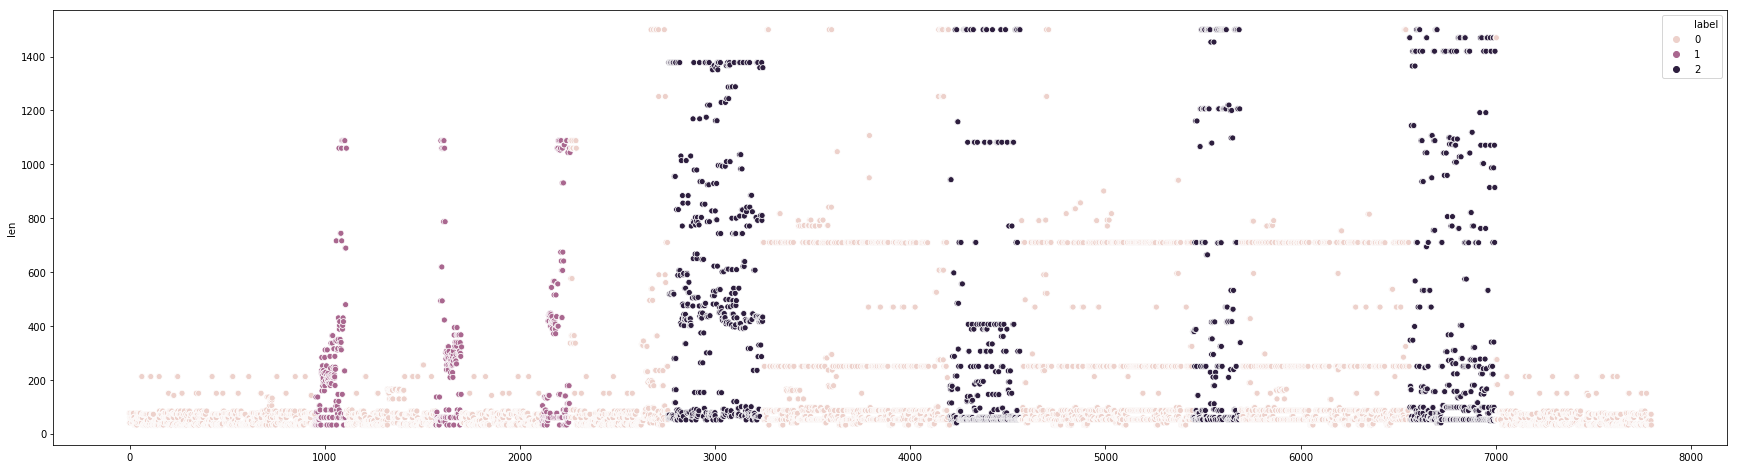

In [8]:
sns.scatterplot(x=range(len(data)), y=data.len, hue=data.label)

In [9]:
# 파생변수 생성 함수
# 직전 1분의 destination IP 별 최대값 생성
def cal_MAX(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).max()
    return new[v.dstIp]

In [10]:
# 직전 1분의 destination IP 별 평균 생성
def cal_MEAN(v, data):
    minute_ago = v.timestamp - dt.timedelta(seconds=60)
    temp = data[data.timestamp >= minute_ago]
    temp = temp[temp.timestamp <= v.timestamp]
    new = temp['cnt'].groupby(temp['dstIp']).mean()
    return new[v.dstIp]

In [11]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [12]:
#max
data['cnt_max'] = data.apply(lambda v: cal_MAX(v, data), axis = 1)

In [13]:
#평균
data['cnt_mean'] = data.apply(lambda v: cal_MEAN(v, data), axis = 1)


In [14]:
#max / mean
data['cnt_max_devide_mean'] = data['cnt_max'] / (data['cnt_mean'] + 0.00000001)

In [15]:
# 영상 패킷만 찾도록 label 수정
data.label = 0
data.loc[(data['timestamp'] >= '2018-10-14 15:54:00') & (data['timestamp'] <= '2018-10-14 15:57:30'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:04:00') & (data['timestamp'] <= '2018-10-14 16:07:30'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:14:00') & (data['timestamp'] <= '2018-10-14 16:17:30'), 'label'] = 1

data.loc[(data['timestamp'] >= '2018-10-14 16:24:00') & (data['timestamp'] <= '2018-10-14 16:31:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:39:00') & (data['timestamp'] <= '2018-10-14 16:46:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 16:54:00') & (data['timestamp'] <= '2018-10-14 17:01:00'), 'label'] = 1
data.loc[(data['timestamp'] >= '2018-10-14 17:09:00') & (data['timestamp'] <= '2018-10-14 17:16:00'), 'label'] = 1


In [16]:
b = data[data.label >= 1]

In [17]:
b = b[data.cnt_max_devide_mean >= 4]

/home/inns-sw/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [18]:
c = data[data.label == 0]

In [19]:
d = pd.merge(b,c, how='outer')

In [20]:
d.cnt_max_devide_mean = minmax_scale(d.cnt_max_devide_mean)
d.cnt_max = minmax_scale(d.cnt_max)

/home/inns-sw/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [21]:
d.head(2)

,dstIp,srcPort,dstPort,srcIp,proto,ipLenCount,len,cnt,ipLenMean,timestamp,label,cnt_max,cnt_mean,cnt_max_devide_mean
0,10.0.0.95,32100,42185,35.176.174.115,17,24,48,6,73.833333,2018-10-14 15:55:08,1,0.123596,2.842105,0.348564
1,10.0.0.95,32100,42185,35.176.174.115,17,24,48,6,73.833333,2018-10-14 15:55:08,1,0.123596,2.842105,0.348564


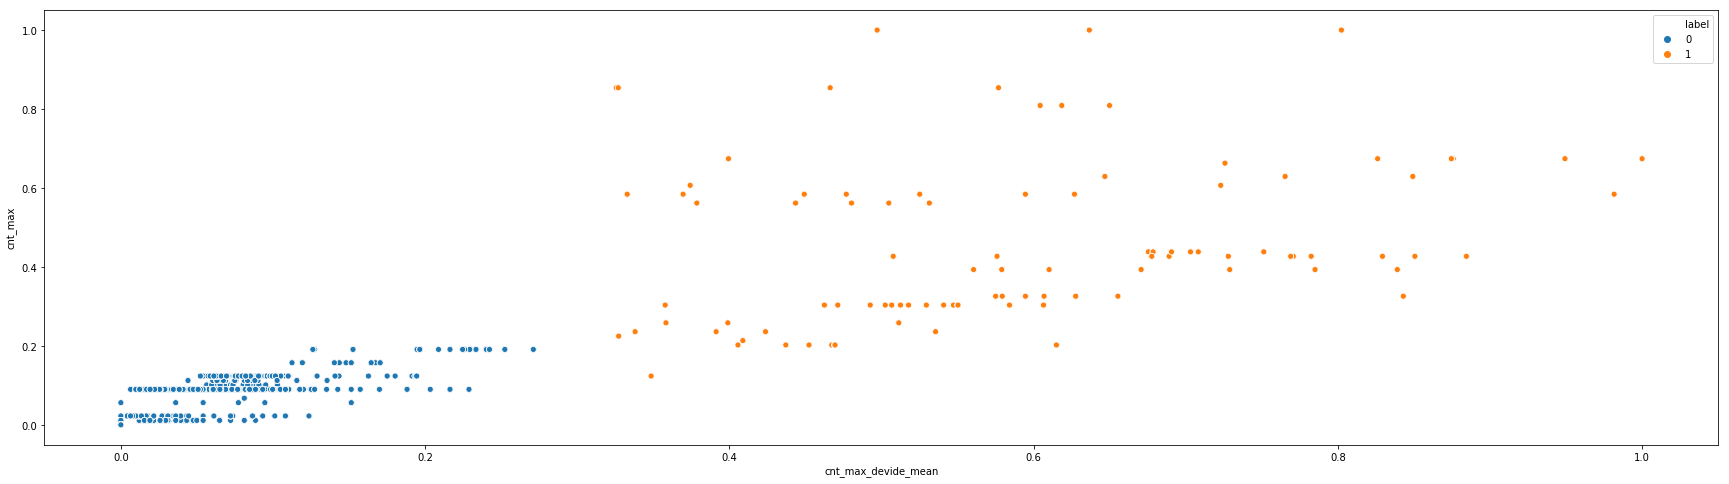

In [22]:
sns.scatterplot(x=d.cnt_max_devide_mean, y=d.cnt_max, hue=d.label)

In [23]:
X = data.loc[:,['cnt_max_devide_mean', 'cnt_max']]

In [24]:
X.cnt_max_devide_mean = minmax_scale(X.cnt_max_devide_mean)
X.cnt_max = minmax_scale(X.cnt_max)

/home/inns-sw/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [25]:
model1 = KMeans(n_clusters=2, algorithm='auto').fit(X)

In [26]:
def plot_cluster(model, c0, c1):
    plt.scatter(X.values[model.labels_ == 0, 0], X.values[model.labels_ == 0, 1], s=100, marker='.', c='r')
    plt.scatter(X.values[model.labels_ == 1, 0], X.values[model.labels_ == 1, 1], s=100, marker='.', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

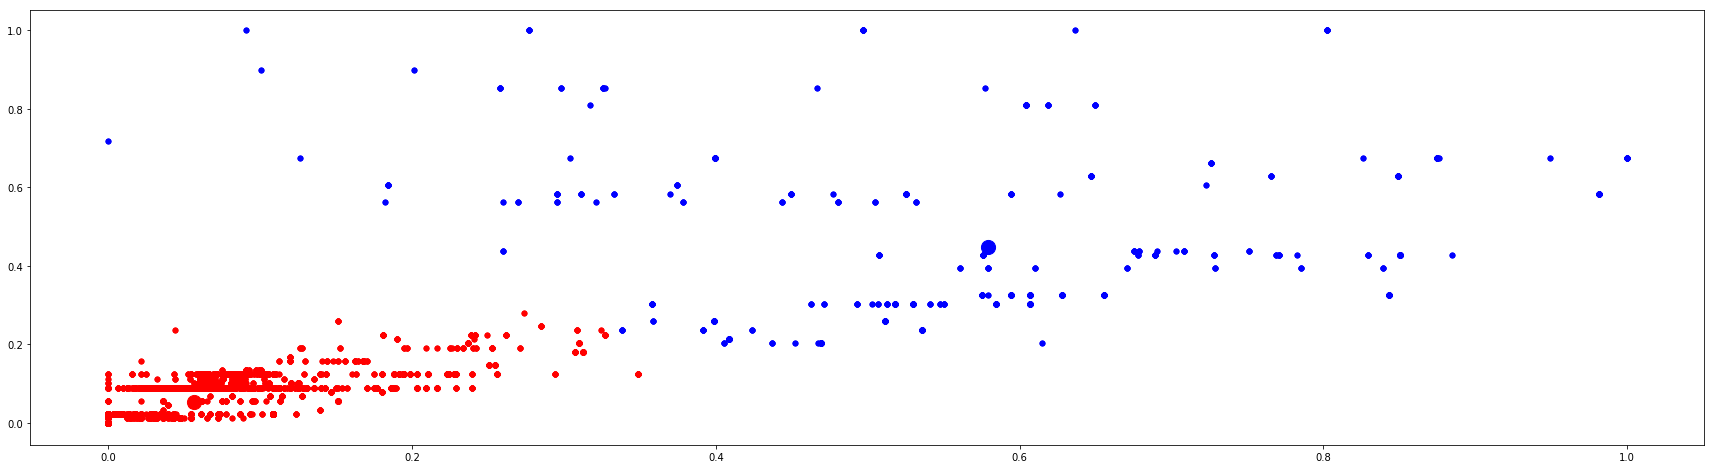

In [27]:
c0, c1 = model1.cluster_centers_
plot_cluster(model1, c0, c1)

In [28]:
model2 = DBSCAN(eps=0.1, min_samples=450).fit(X)
y_pred = model2.fit_predict(X)

Text(0.5, 1.0, 'DBSCAN')

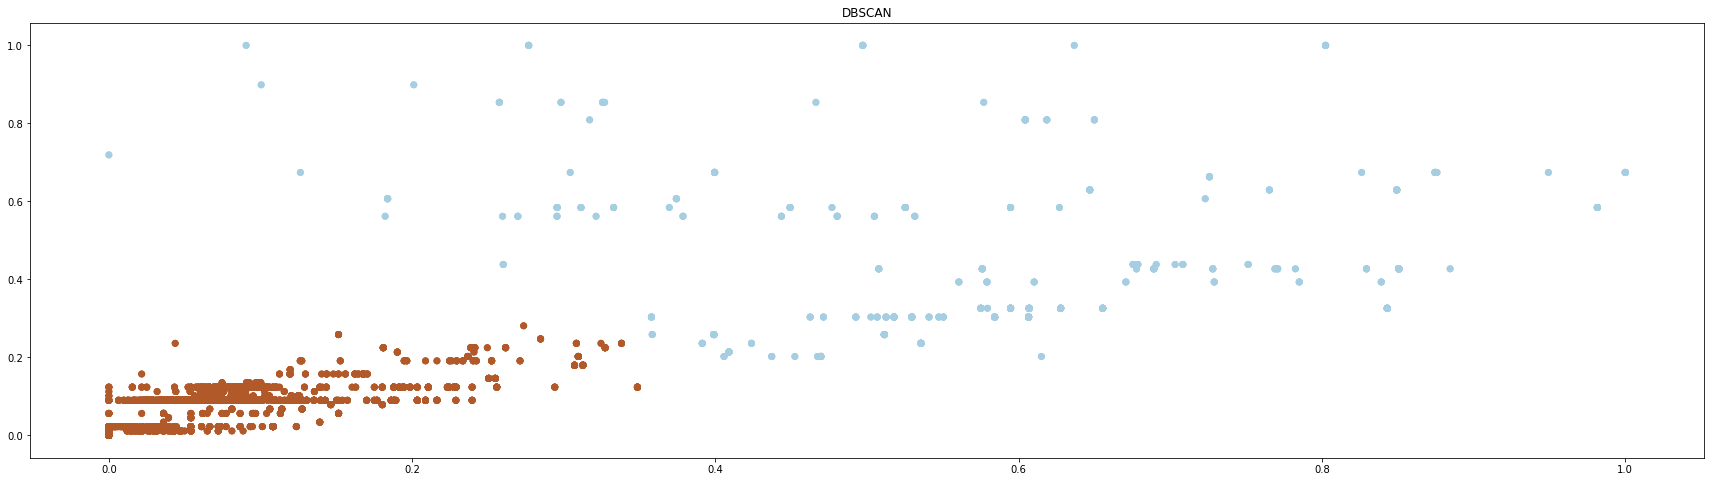

In [29]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [30]:
import itertools

from scipy import linalg
import matplotlib as mpl

In [31]:
data.head(2)

,dstIp,srcPort,dstPort,srcIp,proto,ipLenCount,len,cnt,ipLenMean,timestamp,label,cnt_max,cnt_mean,cnt_max_devide_mean
0,10.0.0.95,53,34750,10.0.0.1,17,0,76,1,0.0,2018-10-14 15:32:55,0,1,1.0,1.0
1,10.0.0.95,808,43554,45.33.49.203,6,0,40,1,0.0,2018-10-14 15:32:55,0,1,1.0,1.0


In [32]:
X = data.loc[:,['cnt_max_devide_mean', 'cnt_max']]

X['cnt_max_devide_mean'] = np.log(X['cnt_max_devide_mean'])
#X['cnt_max'] = np.log(X['cnt_max'])
X['cnt_max_devide_mean']

0      -1.000000e-08
1      -1.000000e-08
2      -1.000000e-08
3      -1.000000e-08
4      -1.000000e-08
5      -1.000000e-08
6      -1.000000e-08
7      -1.000000e-08
8      -1.000000e-08
9      -1.000000e-08
10     -1.000000e-08
11     -1.000000e-08
12     -1.000000e-08
13     -1.000000e-08
14     -1.000000e-08
15     -1.000000e-08
16     -1.000000e-08
17     -1.000000e-08
18     -1.000000e-08
19     -1.000000e-08
20     -1.000000e-08
21     -1.000000e-08
22     -1.000000e-08
23     -1.000000e-08
24     -1.000000e-08
25     -1.000000e-08
26     -1.000000e-08
27     -1.000000e-08
28     -1.000000e-08
29     -1.000000e-08
            ...     
7768   -1.000000e-08
7769   -1.000000e-08
7770   -1.000000e-08
7771   -1.000000e-08
7772   -1.000000e-08
7773   -1.000000e-08
7774   -1.000000e-08
7775   -1.000000e-08
7776   -1.000000e-08
7777   -1.000000e-08
7778   -1.000000e-08
7779   -1.000000e-08
7780    6.931472e-01
7781   -1.000000e-08
7782   -1.000000e-08
7783    6.931472e-01
7784   -1.000

In [33]:
TK = data.loc[:,['cnt_max_devide_mean', 'cnt_max', 'label']]

TK['cnt_max_devide_mean'] = np.log(TK['cnt_max_devide_mean'])
#X['cnt_max'] = np.log(X['cnt_max'])

TK['cnt_max_devide_mean']

0      -1.000000e-08
1      -1.000000e-08
2      -1.000000e-08
3      -1.000000e-08
4      -1.000000e-08
5      -1.000000e-08
6      -1.000000e-08
7      -1.000000e-08
8      -1.000000e-08
9      -1.000000e-08
10     -1.000000e-08
11     -1.000000e-08
12     -1.000000e-08
13     -1.000000e-08
14     -1.000000e-08
15     -1.000000e-08
16     -1.000000e-08
17     -1.000000e-08
18     -1.000000e-08
19     -1.000000e-08
20     -1.000000e-08
21     -1.000000e-08
22     -1.000000e-08
23     -1.000000e-08
24     -1.000000e-08
25     -1.000000e-08
26     -1.000000e-08
27     -1.000000e-08
28     -1.000000e-08
29     -1.000000e-08
            ...     
7768   -1.000000e-08
7769   -1.000000e-08
7770   -1.000000e-08
7771   -1.000000e-08
7772   -1.000000e-08
7773   -1.000000e-08
7774   -1.000000e-08
7775   -1.000000e-08
7776   -1.000000e-08
7777   -1.000000e-08
7778   -1.000000e-08
7779   -1.000000e-08
7780    6.931472e-01
7781   -1.000000e-08
7782   -1.000000e-08
7783    6.931472e-01
7784   -1.000

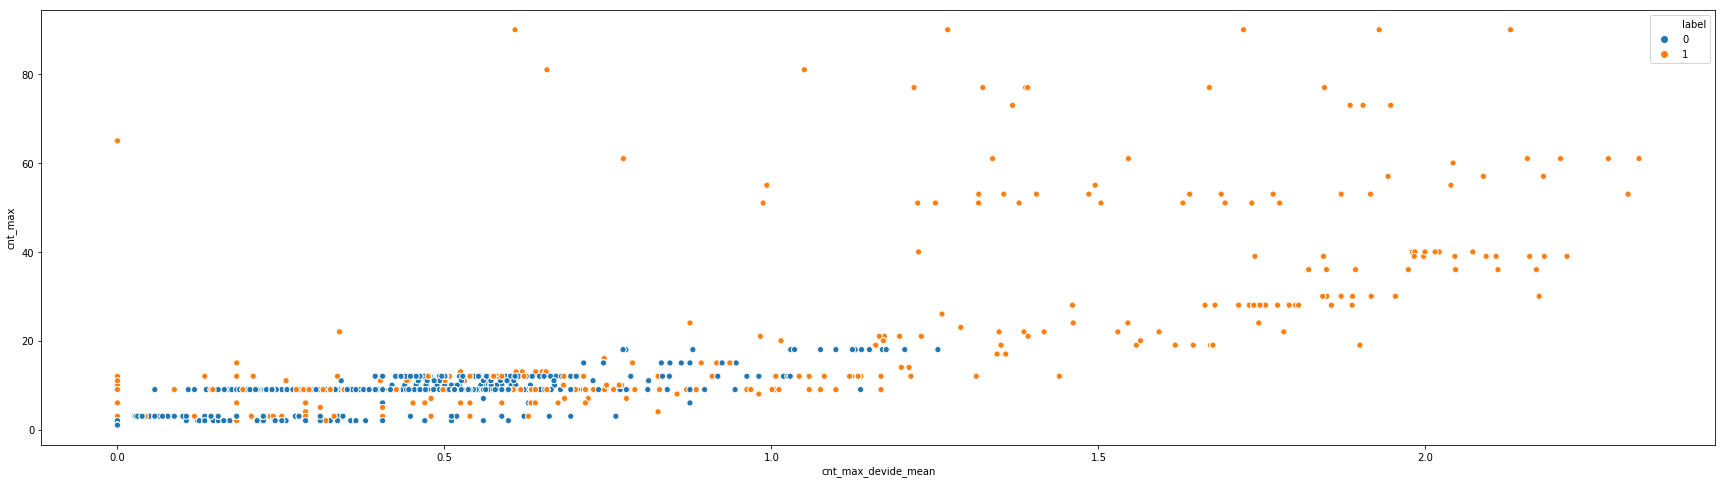

In [34]:
sns.scatterplot(x=TK['cnt_max_devide_mean'], y=TK['cnt_max'], hue= TK['label'])

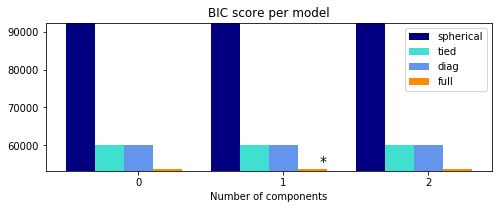

In [35]:
lowest_bic = np.infty
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(0, 3)
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=2,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



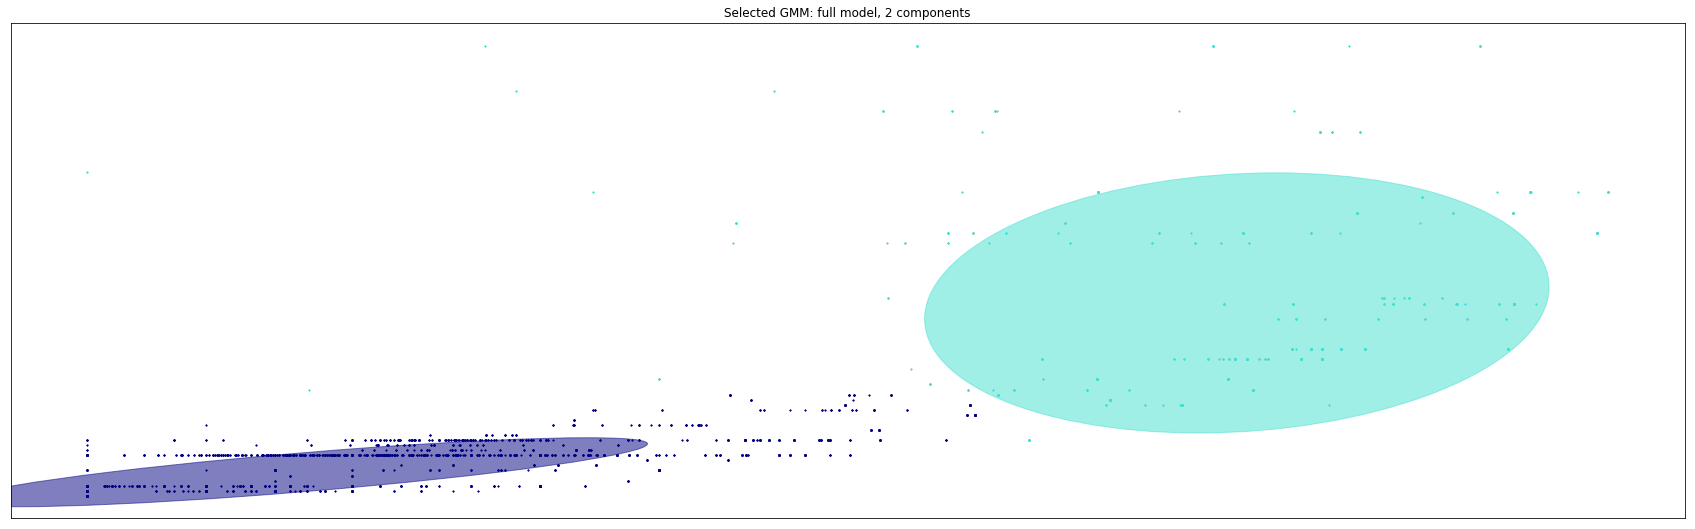

In [36]:
# Plot the winner
splot = plt.subplot()
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X.iloc[Y_ == i, 0], X.iloc[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()